# Titanic Dataset

In [25]:
from __future__ import division #needed for Python 2.7

from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns #Works with matplotlib
import os
import unicodecsv
from collections import defaultdict
import pandas as pd
%matplotlib inline

# definition to handle some plotting items to reduce code
def reduce_printing_code():
    ax.set_xticks(index + bar_width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, fontsize=12)
    plt.legend()
    plt.tight_layout()

In [2]:
# provides path for importing graphics
os.getcwd()

'/home/kgarbutt/Dropbox/Udacity/titanic'

In [3]:
import platform #Tells version of Python
print(platform.python_version())

2.7.12


# RMS Titanic Summary

RMS Titanic (/taɪˈtænɪk/) was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial maritime disasters in modern history. The Titanic carried only enough lifeboats for 1,178 people—slightly more than half of the number on board, and one third of her total capacity.
(From Wikipedia, the free encyclopedia)

Our dataset contains the names & information of 891 of those passengers.

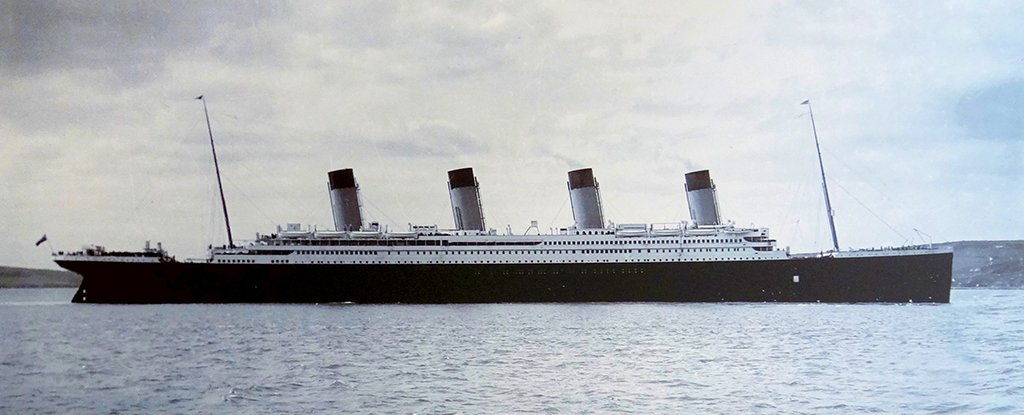

In [4]:
# Picture of the Titanic
from IPython.display import Image
Image(filename= 'titanic-1.jpg')

## Introduction

This data analysis will use the dataset of the Titanic to answer various questions about the survivors. It will attempt to answer questions like was there a class advantage, did more females survive than males, did age matter? It will make an attempt to understand what factors contributed to an individual's survival. The dataset was checked for missing values before any calculations were done.

## Data

In [5]:
# read in titanic-data.csv into a DataFrame as data
data = pd.read_csv('/home/kgarbutt/Dropbox/Udacity/titanic/titanic-data.csv')
#data.head()
data[0:2]
#data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C


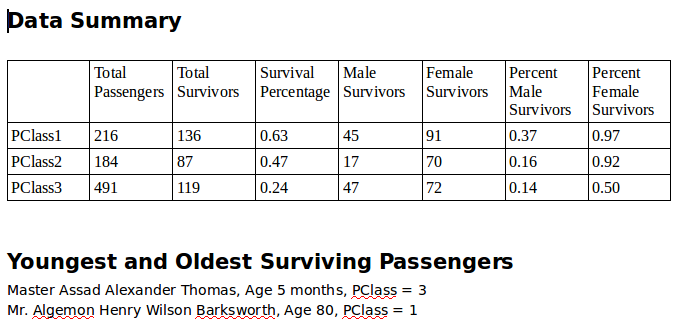

In [6]:
# data summarized
from IPython.display import Image
Image(filename= 'Data_Summary.png')

## Data Analysis

In [7]:
# total passengers
len(data)

891

In [8]:
# check for null values in dataframe fields
data[('Pclass')].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [9]:
# get oldest and youngest passenger
get_ages = get_passenger_age_info = data.groupby('Age').max()
# get_ages.head()
get_ages.tail()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
70.0,746,0,2,"Mitchell, Mr. Henry Michael",male,1,1,WE/P 5735,71.0000,B22,S
70.5,117,0,3,"Connors, Mr. Patrick",male,0,0,370369,7.7500,NaN,Q
71.0,494,0,1,"Goldschmidt, Mr. George B",male,0,0,PC 17754,49.5042,A5,C
74.0,852,0,3,"Svensson, Mr. Johan",male,0,0,347060,7.7750,NaN,S
80.0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,0,0,27042,30.0000,A23,S


In [10]:
# total passengers from each class
total_passengers = data.groupby('Pclass')['PassengerId'].count()
total_passengers
#total_passengers.sum() = 891

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [11]:
# check for null values in dataframe fields
data[('Survived')].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [12]:
# total survivors from each class
survivors = data.groupby('Pclass')['Survived'].sum()
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [13]:
# passenger survival percentage
survivor_percentage = survivors / total_passengers
survivor_percentage.round(2)

Pclass
1    0.63
2    0.47
3    0.24
dtype: float64

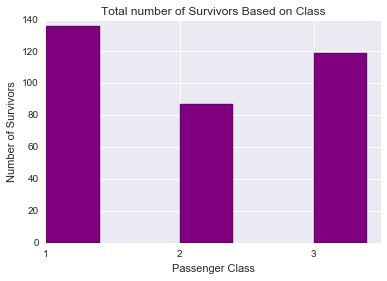

In [14]:
# plotting the total number of survivors
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='purple', width=0.4)
ax.set_ylabel('Number of Survivors')
ax.set_xlabel('Passenger Class')
ax.set_title('Total number of Survivors Based on Class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist());

Graph illustrates the total number of survivors based on class.

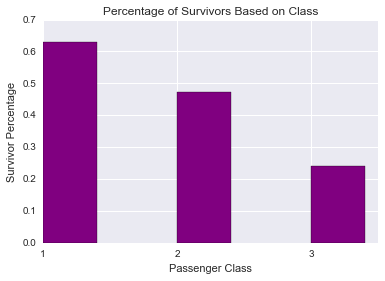

In [15]:
# percentage of survivors from each class
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage,
              color='purple', width=0.4)
ax.set_ylabel('Survivor Percentage')
ax.set_xlabel('Passenger Class')
ax.set_title('Percentage of Survivors Based on Class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.show();

Graph illustrates that third class passengers fared the worst of the three classes.

In [16]:
# male passengers who survived in each class
male_survivors = data[data['Sex'] == 'male'].groupby('Pclass')['Survived'].sum()
male_survivors

# total male passengers in each class
total_male_passengers = data[data['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
total_male_passengers

# surviving males as a percentage
male_survivor_percentage = male_survivors / total_male_passengers
male_survivor_percentage.round(2)

Pclass
1    0.37
2    0.16
3    0.14
dtype: float64

In [17]:
# percentage of surviving males by class
male_survivors = data[data['Sex'] == 'male'].groupby('Pclass')['Survived'].sum()
male_survivors

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [18]:
# female passengers who survived in each class
female_survivors = data[data['Sex'] == 'female'].groupby('Pclass')['Survived'].sum()
female_survivors

# total female passengers in each class
total_female_passengers = data[data['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
total_female_passengers

# surviving females as a percentage
female_survivor_percentage = female_survivors / total_female_passengers
female_survivor_percentage.round(2)

Pclass
1    0.97
2    0.92
3    0.50
dtype: float64

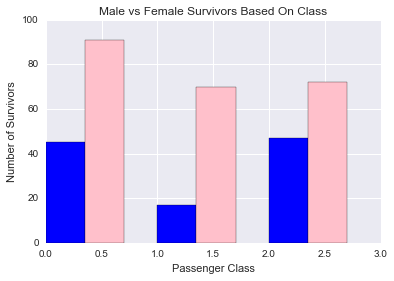

In [19]:
# plot number of survivors as a function of male & female
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bar_width = 0.35
index = np.arange(male_survivors.count())
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Male')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='pink',
               label='Female')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Survivors')
ax.set_title('Male vs Female Survivors Based On Class')
xTickMarks = male_survivors.index.values.tolist()
reduce_printing_code
plt.show()

Graph illustrates that there was a majority of female survivors.

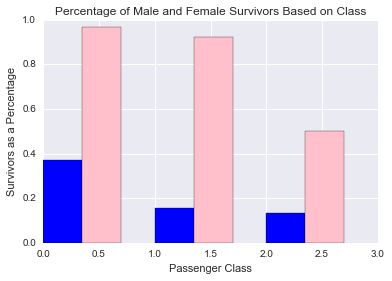

In [20]:
# plot of percentage of survivors as a function of male & female
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
index = np.arange(male_survivor_percentage.count())
rect_1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Male')
rect_2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, 
                color='pink', label='Female')
bar_width = 0.35
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survivors as a Percentage')
ax.set_title('Percentage of Male and Female Survivors Based on Class')
xTickMarks = male_survivors.index.values.tolist()
reduce_printing_code
plt.show()

Graph illustrates that there was a greater percentage of female survivors across all three classes, and that they were given preference to the life boats.

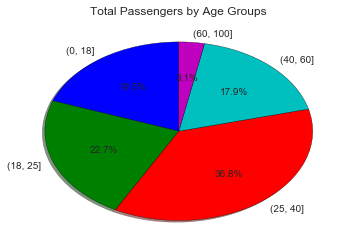

In [21]:
# total passenders by age group

#define the age groups
age_bin = [0, 18, 25, 40, 60, 100]
#create the necessary age bins
data['age_bin'] = pd.cut(data.Age, bins=age_bin)
#remove null rows
remove_na = data[np.isfinite(data['Age'])]
#number of survivors based on age__groups
survivors2 = remove_na.groupby('age_bin')['Survived'].agg(sum)
#total passengers in each age group
total_passengers2 = remove_na.groupby('age_bin')['Survived'].agg('count')
#plot the pie chart of total passengers in each age_group
plt.pie(total_passengers2,
        labels=total_passengers2.index.tolist(),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers by Age Groups')
plt.show()


The graph illustrates that the largest age group was between 25 to 40 year olds, and the over 60 age group was the smallest.

In [22]:
total_passengers2

age_bin
(0, 18]      139
(18, 25]     162
(25, 40]     263
(40, 60]     128
(60, 100]     22
Name: Survived, dtype: int64

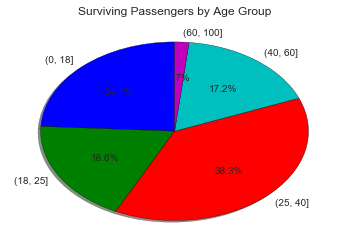

In [23]:
# surviving passengers by age group
plt.pie(survivors2,
        labels=survivors2.index.tolist(),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Surviving Passengers by Age Group')
plt.show()


The graph illustrates that the 25 to 40 age group had the highest surviving passengers, while the 0 to 18 age group had the second largest surviving group.

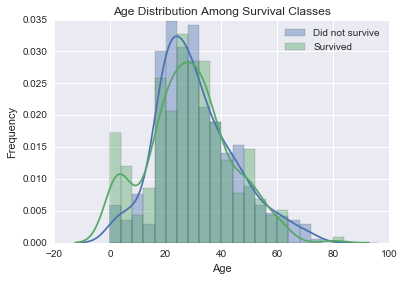

In [24]:
# graph age distribution amoung survival classes
age_bins = np.arange(0, 100, 4)
sns.distplot(data.loc[(data['Survived']==0) & (~data['Age'].isnull()),'Age'], bins=age_bins)
sns.distplot(data.loc[(data['Survived']==1) & (~data['Age'].isnull()),'Age'], bins=age_bins)
plt.title('Age Distribution Among Survival Classes')
plt.ylabel('Frequency')
plt.legend(['Did not survive', 'Survived']);

The graph illustrates that young children had a survival advantage as represented by the spike in the 0 to 4 age group (represented by the first bar).

## Conclusions

According to the analysis, if you wanted to survive the sinking of the Titanic, then it would have helped for you to be a first class female passenger between the ages of 25 to 40, or at least a female as their survival rate was greater across all three passenger classes. It's clear that females were given preference to the life boats. Additionally, the analysis shows that young children had a survival advantage. Another important point the data illustrates is that overall the 3rd class passengers faired the worst. 

While the dataset lists the fare that each indiviual paid, it doesn't provide a good understanding as to what the fare really means. This is certainly a limitation in the dataset. Additionally, the analysis only includes survivors -- it doesn't include non-survivors.

# References


McKinney, Wes (2013) Python for Data Analysis. Sebastopol, CA: O'Reilly Media, Inc.

VanderPlas, Jake (2017) Python Data Science Handbook. Sebastopol, CA: O'Reilly Media, Inc.


Undacity NumPy and Pandas for 2D Data Homework Set